Loading the dataset using the APIKey

In [1]:
#Dataset API key
!kaggle datasets download hijest/genre-classification-dataset-imdb


Dataset URL: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb
License(s): other
 98% 41.0M/41.7M [00:03<00:00, 21.2MB/s]
100% 41.7M/41.7M [00:03<00:00, 13.7MB/s]


Extracting the zip file of the dataset

In [2]:
import zipfile

# Extracting the zip file without listing contents
with zipfile.ZipFile('/content/genre-classification-dataset-imdb.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_files')


Loading and preview the train_data.txt

In [3]:
import os
import pandas as pd

# Define extracted_path with the correct path
extracted_path = '/content/extracted_files/Genre Classification Dataset'
file_path = os.path.join(extracted_path, 'train_data.txt')


raw_data = pd.read_csv(file_path, sep=" ::: ", engine='python', on_bad_lines='skip', header=None, names=["ID", "Title", "Genre", "Description"])

print("\nProcessed Dataset Overview:")
print(raw_data.info())

print("\nFirst Few Rows of the Processed Dataset:")
print(raw_data.head())


Processed Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None

First Few Rows of the Processed Dataset:
   ID                             Title     Genre  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     adult   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     drama   

                                         Description  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students f

Loading  and preview the  test_data.**txt**

In [4]:

file_path = os.path.join(extracted_path, 'test_data.txt')


raw_data = pd.read_csv(file_path, sep=" ::: ", engine='python', on_bad_lines='skip', header=None, names=["ID", "Title", "Genre", "Description"])


print("\nProcessed Dataset Overview:")
print(raw_data.info())

print("\nFirst Few Rows of the Processed Dataset:")
print(raw_data.head())


Processed Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           54200 non-null  int64  
 1   Title        54200 non-null  object 
 2   Genre        54200 non-null  object 
 3   Description  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ MB
None

First Few Rows of the Processed Dataset:
   ID                        Title  \
0   1         Edgar's Lunch (1998)   
1   2     La guerra de papá (1977)   
2   3  Off the Beaten Track (2010)   
3   4       Meu Amigo Hindu (2015)   
4   5            Er nu zhai (1955)   

                                               Genre  Description  
0  L.R. Brane loves his life - his car, his apart...          NaN  
1  Spain, March 1964: Quico is a very naughty chi...          NaN  
2  One year in the life of Albin and his family o...          NaN  
3

Loading and preview the test_data_solution.txt

In [5]:

file_path = os.path.join(extracted_path, 'test_data_solution.txt')

raw_data = pd.read_csv(file_path, sep=" ::: ", engine='python', on_bad_lines='skip', header=None, names=["ID", "Title", "Genre", "Description"])


print("\nProcessed Dataset Overview:")
print(raw_data.info())

print("\nFirst Few Rows of the Processed Dataset:")
print(raw_data.head())


Processed Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Genre        54200 non-null  object
 3   Description  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None

First Few Rows of the Processed Dataset:
   ID                        Title        Genre  \
0   1         Edgar's Lunch (1998)     thriller   
1   2     La guerra de papá (1977)       comedy   
2   3  Off the Beaten Track (2010)  documentary   
3   4       Meu Amigo Hindu (2015)        drama   
4   5            Er nu zhai (1955)        drama   

                                         Description  
0  L.R. Brane loves his life - his car, his apart...  
1  Spain, March 1964: Quico is a very naughty chi...  
2  One year in the life of Albin and his family 

 visualizing Genre Distribution

In [6]:
# Extract unique genres from the 'Genre' column
genres = raw_data['Genre'].unique()

# Print the genres
print("All Genres in the Dataset:")
for genre in genres:
    print(genre)


All Genres in the Dataset:
thriller
comedy
documentary
drama
horror
short
western
family
sport
romance
war
game-show
biography
adult
talk-show
action
music
crime
animation
sci-fi
adventure
reality-tv
fantasy
mystery
history
news
musical


In [ ]:
import plotly.express as px


genre_counts = raw_data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']


fig = px.bar(genre_counts, x='Genre', y='Count',
             color='Count',
             title='Genre Distribution',
             labels={'Genre': 'Genre', 'Count': 'Number of Movies'},
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Genre', yaxis_title='Count', xaxis=dict(tickangle=-45))
fig.show()


 Description Length Distribution

In [ ]:

raw_data['Description_Length'] = raw_data['Description'].str.len()


fig = px.histogram(raw_data, x='Description_Length',
                   nbins=30,
                   title='Description Length Distribution',
                   labels={'Description_Length': 'Description Length'},
                   color_discrete_sequence=['blue'])


fig.update_layout(xaxis_title='Description Length', yaxis_title='Frequency')
fig.show()


 Top Genres by Average Description Length

In [ ]:

avg_desc_length = raw_data.groupby('Genre')['Description_Length'].mean().reset_index()
avg_desc_length = avg_desc_length.sort_values('Description_Length', ascending=False)


fig = px.bar(avg_desc_length, x='Genre', y='Description_Length',
             color='Description_Length',
             title='Average Description Length by Genre',
             labels={'Genre': 'Genre', 'Description_Length': 'Average Description Length'},
             color_continuous_scale='Plasma')

fig.update_layout(xaxis_title='Genre', yaxis_title='Average Description Length', xaxis=dict(tickangle=-45))
fig.show()


 Word Cloud for Descriptions

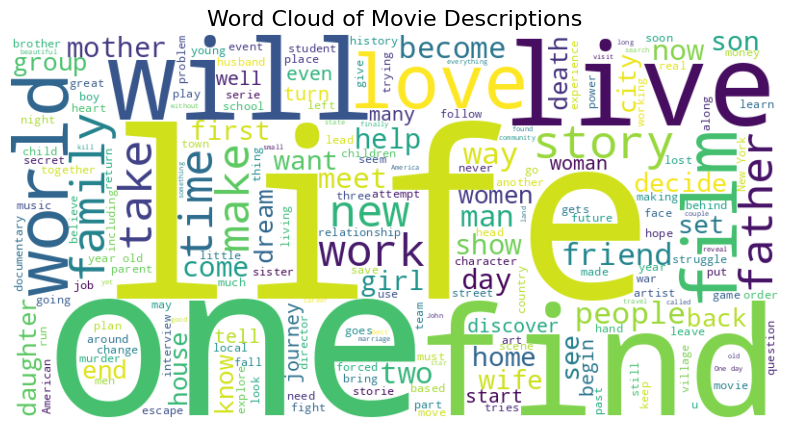

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text = ' '.join(raw_data['Description'].dropna())


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Descriptions', fontsize=16)
plt.show()


Correlation Between Description Length and Genre

In [ ]:

fig = px.scatter(raw_data, x='Genre', y='Description_Length',
                 title='Description Length by Genre',
                 labels={'Genre': 'Genre', 'Description_Length': 'Description Length'},
                 color='Genre')


fig.update_layout(xaxis_title='Genre', yaxis_title='Description Length', xaxis=dict(tickangle=-45))
fig.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import string

# Assuming raw_data is your DataFrame

# Preprocess the 'Description' column
raw_data['Processed_Description'] = raw_data['Description'].str.lower()  # Example: Lowercasing
raw_data['Processed_Description'] = raw_data['Processed_Description'].str.translate(str.maketrans('', '', string.punctuation))  # Removing punctuation

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_description = vectorizer.fit_transform(raw_data['Processed_Description'])

# Encode genre using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_genre = label_encoder.fit_transform(raw_data['Genre'])

LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_description, y_genre, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



In [ ]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score # Importing accuracy_score

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

              precision    recall  f1-score   support

      action       0.57      0.23      0.32       230
       adult       0.76      0.14      0.24       111
   adventure       0.70      0.13      0.21       150
   animation       0.67      0.02      0.04        98
   biography       0.00      0.00      0.00        53
      comedy       0.52      0.59      0.55      1513
       crime       0.67      0.02      0.04       110
 documentary       0.64      0.89      0.75      2579
       drama       0.54      0.79      0.64      2764
      family       0.64      0.04      0.08       167
     fantasy       0.00      0.00      0.00        74
   game-show       0.94      0.39      0.55        41
     history       0.00      0.00      0.00        42
      horror       0.67      0.50      0.57       474
       music       0.74      0.33      0.46       154
     musical       0.00      0.00      0.00        54
     mystery       0.00      0.00      0.00        60
        news       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Fine Tuning

In [ ]:
'''from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
'''

'from sklearn.model_selection import GridSearchCV\n\n# Hyperparameter tuning for Logistic Regression\nparam_grid = {\'C\': [0.1, 1, 10], \'solver\': [\'lbfgs\', \'liblinear\']}\ngrid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, n_jobs=-1)\n\n# Fit grid search\ngrid_search.fit(X_train, y_train)\n\n# Best parameters\nprint("Best Parameters:", grid_search.best_params_)\n'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have X_train, y_train from your TF-IDF feature extraction and genre encoding

# Define the model with the best parameters
fine_model = LogisticRegression(C=10, solver='liblinear')


# Train the fine_model
fine_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = fine_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display the classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 58.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.33      0.40       230
           1       0.65      0.25      0.36       111
           2       0.58      0.22      0.32       150
           3       0.32      0.06      0.10        98
           4       0.00      0.00      0.00        53
           5       0.53      0.60      0.56      1513
           6       0.13      0.02      0.03       110
           7       0.68      0.85      0.75      2579
           8       0.55      0.74      0.63      2764
           9       0.49      0.12      0.19       167
          10       0.57      0.05      0.10        74
          11       0.90      0.44      0.59        41
          12       0.00      0.00      0.00        42
          13       0.65      0.56      0.60       474
          14       0.71      0.48      0.57       154
          15       0.60      0.06      0.10        54
          16       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
import joblib

# Save the model
joblib.dump(fine_model, 'logistic_model.pkl')
print("Model saved successfully!")


Model saved successfully!


RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Accuracy: 48.99%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.01      0.02       230
           1       0.67      0.04      0.07       111
           2       0.70      0.09      0.16       150
           3       0.00      0.00      0.00        98
           4       0.00      0.00      0.00        53
           5       0.55      0.25      0.34      1513
           6       0.00      0.00      0.00       110
           7       0.54      0.90      0.68      2579
           8       0.42      0.84      0.56      2764
           9       1.00      0.03      0.06       167
          10       0.00      0.00      0.00        74
          11       0.95      0.44      0.60        41
          12       0.00      0.00      0.00        42
          13       0.75      0.11      0.20       474
          14       1.00      0.12      0.22       154
          15       1.00      0.02      0.04        54
          16       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
import joblib

# Save the model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Model saved successfully!")


Model saved successfully!


Support vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train an SVM classifier
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


Accuracy: 59.75%

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40       230
           1       0.68      0.29      0.41       111
           2       0.67      0.21      0.32       150
           3       0.45      0.09      0.15        98
           4       0.00      0.00      0.00        53
           5       0.53      0.62      0.57      1513
           6       0.17      0.02      0.03       110
           7       0.68      0.87      0.76      2579
           8       0.55      0.77      0.64      2764
           9       0.62      0.09      0.16       167
          10       0.38      0.04      0.07        74
          11       0.88      0.51      0.65        41
          12       0.00      0.00      0.00        42
          13       0.67      0.54      0.60       474
          14       0.72      0.47      0.57       154
          15       1.00      0.04      0.07        54
          16       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
import joblib

# Save the SVM model
joblib.dump(svm_model, 'svm_model.pkl')
print("SVM Model saved successfully!")


SVM Model saved successfully!


 Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred_nb) * 100:.2f}%')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))


Accuracy: 44.35%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       230
           1       0.00      0.00      0.00       111
           2       0.00      0.00      0.00       150
           3       0.00      0.00      0.00        98
           4       0.00      0.00      0.00        53
           5       0.71      0.04      0.07      1513
           6       0.00      0.00      0.00       110
           7       0.52      0.90      0.66      2579
           8       0.38      0.88      0.54      2764
           9       0.00      0.00      0.00       167
          10       0.00      0.00      0.00        74
          11       0.00      0.00      0.00        41
          12       0.00      0.00      0.00        42
          13       0.00      0.00      0.00       474
          14       0.00      0.00      0.00       154
          15       0.00      0.00      0.00        54
          16       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
import joblib

# Save the Naive Bayes model
joblib.dump(nb_model, 'naive_bayes_model.pkl')
print("Naive Bayes model saved successfully!")


Naive Bayes model saved successfully!


XGBoost Classifier

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Convert to DMatrix format (XGBoost's optimized data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': len(set(y_train)),  # Number of unique genres
    'max_depth': 6,
    'eta': 0.3,
    'eval_metric': 'merror'
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Predict on the test data
y_pred_xgb = xgb_model.predict(dtest)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgb) * 100:.2f}%')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


Accuracy: 54.51%

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.18      0.25       230
           1       0.52      0.23      0.32       111
           2       0.47      0.17      0.25       150
           3       0.38      0.09      0.15        98
           4       0.00      0.00      0.00        53
           5       0.52      0.46      0.48      1513
           6       0.00      0.00      0.00       110
           7       0.63      0.82      0.71      2579
           8       0.50      0.77      0.60      2764
           9       0.44      0.07      0.11       167
          10       0.15      0.03      0.05        74
          11       0.88      0.56      0.69        41
          12       0.00      0.00      0.00        42
          13       0.59      0.44      0.51       474
          14       0.62      0.47      0.53       154
          15       0.20      0.04      0.06        54
          16       0.00      0.00      0

In [ ]:
# Save the XGBoost model to a file
xgb_model.save_model('xgboost_model.json')
print("XGBoost model saved successfully!")


XGBoost model saved successfully!


 K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn) * 100:.2f}%')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


Accuracy: 38.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.25      0.18       230
           1       0.16      0.25      0.19       111
           2       0.19      0.19      0.19       150
           3       0.11      0.14      0.12        98
           4       0.07      0.04      0.05        53
           5       0.28      0.33      0.30      1513
           6       0.07      0.03      0.04       110
           7       0.49      0.69      0.57      2579
           8       0.42      0.46      0.44      2764
           9       0.27      0.09      0.14       167
          10       0.11      0.03      0.04        74
          11       0.61      0.56      0.58        41
          12       0.00      0.00      0.00        42
          13       0.42      0.24      0.30       474
          14       0.67      0.25      0.36       154
          15       0.12      0.02      0.03        54
          16       0.00      0.00      0

 Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred_gb) * 100:.2f}%')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))


KeyboardInterrupt: 

In [ ]:
import joblib

# Save the Gradient Boosting model
joblib.dump(gb_model, 'gradient_boosting_model.pkl')
print("Gradient Boosting model saved successfully!")


In [ ]:
# Example new description
new_description = "A retired boxer trains a young underdog, helping him overcome personal struggles and rise to greatness"

# Preprocess the new description
new_description_processed = new_description.lower()  # Example: Lowercasing
new_description_processed = new_description_processed.translate(str.maketrans('', '', string.punctuation))  # Removing punctuation

# Transform the new description using the TF-IDF vectorizer
new_description_tfidf = vectorizer.transform([new_description_processed])

# Predict the genre using the trained model
predicted_genre = svm_model.predict(new_description_tfidf)

# Decode the predicted genre back to the original genre label
predicted_genre_label = label_encoder.inverse_transform(predicted_genre)

print(f"Predicted Genre: {predicted_genre_label[0]}")


Predicted Genre: drama


In [ ]:
# Importing Libraries
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK data
nltk.download('wordnet')
nltk.download('stopwords')


# Preprocessing Functions
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization and stopword removal
    words = [word for word in text.split() if word not in stop_words]
    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Preprocess the 'Description' column
raw_data['Processed_Description'] = raw_data['Description'].apply(preprocess_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_description = vectorizer.fit_transform(raw_data['Processed_Description'])

# Label Encoding for Genres
label_encoder = LabelEncoder()
y_genre = label_encoder.fit_transform(raw_data['Genre'])

# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_description, y_genre)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model Training and Evaluation

# Support Vector Machine
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Hyperparameter Tuning for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest Parameters for SVM:", grid_search.best_params_)
best_svm_model = grid_search.best_estimator_
y_pred_best_svm = best_svm_model.predict(X_test)

print("\nOptimized SVM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_svm) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_svm))

# Ensemble Model
ensemble_model = VotingClassifier(
    estimators=[
        ('svm', svm_model),
        ('rf', rf_model)
    ],
    voting='hard'
)
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

print("\nEnsemble Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ensemble) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble))

# Testing the Model on New Data
def predict_genre(description, model):
    processed_desc = preprocess_text(description)
    vectorized_desc = vectorizer.transform([processed_desc])
    predicted_genre = model.predict(vectorized_desc)
    return label_encoder.inverse_transform(predicted_genre)[0]

# Sample Test Description
test_description = "A young orphaned girl embarks on an adventure to find her true identity in a mystical land."
predicted_genre = predict_genre(test_description, ensemble_model)
print(f"\nPredicted Genre for Test Description: {predicted_genre}")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
